In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import corner
import astropy.coordinates as coord
import astropy.units as u

In [62]:
plt.rcParams['figure.dpi'] = 100

# Generated Fake Data
## Summary Table

NOTE: This table contains mean values, opposed to the medians in the corner plots. Throughout, $\sigma_{XIZ}$ is fixed unless otherwise noted. The input values to generate the dataset were $\alpha=\rm{log}_{10}(0.82)\sim-0.0862$, $\beta=2.87$ and $\gamma=0.42$.

| Completeness (%) | $\alpha_{YIX}$ | $\beta_{YIZ}$ | $\gamma_{YIZ}$ | $\sigma_{YIZ}$ |
| --- | --- | --- | --- | --- |
| 100% | $-0.020\pm0.064$ | $2.69\pm0.23$ | 0.42 | $0.12\pm0.021$ |
| 100% | $-0.054\pm0.075$ | $2.47\pm0.36$ | $5.97\pm7.07$ | $0.12\pm0.020$ |
|  90% | $-0.059\pm0.054$ | $2.86\pm0.19$ | 0.42 | $0.12\pm0.017$ |
|  90% | $-0.082\pm0.054$ | $2.53\pm0.28$ | $6.10\pm3.64$ | $0.12\pm0.016$ |
|  80% | $-0.027\pm0.034$ | $2.75\pm0.13$ | 0.42 | $0.12\pm0.015$ |
|  80% | $-0.075\pm0.042$ | $2.52\pm0.18$ | $5.32\pm2.70$ | $0.12\pm0.014$ |
|  70% | $-0.020\pm0.022$ | $2.73\pm0.09$ | 0.42 | $0.11\pm0.011$ |
|  70% | $-0.051\pm0.029$ | $2.62\pm0.11$ | $2.54\pm1.31$ | $0.11\pm0.010$ |
|  60% | $-0.046\pm0.021$ | $2.84\pm0.08$ | 0.42 | $0.11\pm0.010$ |
|  60% | $-0.077\pm0.024$ | $2.71\pm0.10$ | $2.57\pm0.93$ | $0.10\pm0.010$ |
|  50% | $-0.044\pm0.019$ | $2.85\pm0.07$ | 0.42 | $0.10\pm0.010$ |
|  50% | $-0.074\pm0.022$ | $2.71\pm0.09$ | $2.45\pm0.75$ | $0.10\pm0.010$ |
|  45% (all) | $-0.044\pm0.017$ | $2.85\pm0.07$ | 0.42 | $0.10\pm0.010$ |
|  45% (all) | $-0.074\pm0.020$ | $2.74\pm0.08$ | $2.15\pm0.68$ | $0.10\pm0.010$ |

In [3]:
def make_corner_plot(filename, gamma_fixed=True):
    df = pd.read_csv(f"/Users/rd268277/analysis/charms/scaling/fake_data/{filename}.dat", sep='\s+')
    if gamma_fixed == True:
        data = np.vstack([np.array(df["alpha.YIZ"]), np.array(df["beta.YIZ"]), np.array(df["sigma.YIZ.0"])]).T
        figure = corner.corner(data, labels=[r"$\alpha_{\rm YIZ}$", r"$\beta_{\rm YIZ}$", r"$\sigma_{\rm YIZ}$"], quantiles=[0.16, 0.5, 0.84], show_titles=True, title_kwargs={"fontsize": 14})
    elif gamma_fixed == False:
        data = np.vstack([np.array(df["alpha.YIZ"]), np.array(df["beta.YIZ"]), np.array(df["gamma.YIZ"]), np.array(df["sigma.YIZ.0"])]).T
        figure = corner.corner(data, labels=[r"$\alpha_{\rm YIZ}$", r"$\beta_{\rm YIZ}$", r"$\gamma_{\rm YIZ}$", r"$\sigma_{\rm YIZ}$"], quantiles=[0.16, 0.5, 0.84], show_titles=True, title_kwargs={"fontsize": 14})
    return figure

### 100% completeness, $\gamma=0.42$

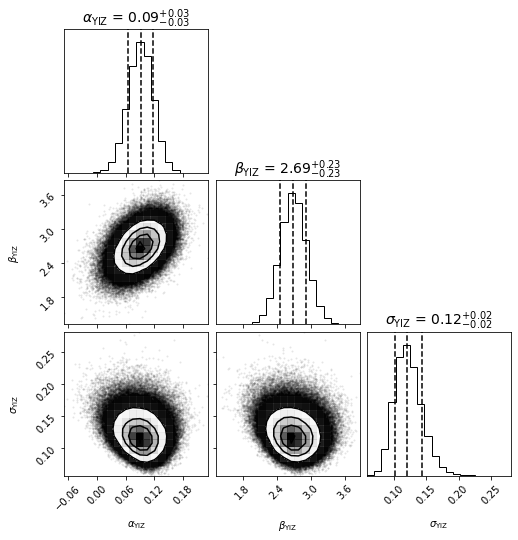

In [3]:
_100fix = make_corner_plot("mcmc_gfix_100")

### 100% completeness, $\gamma$ thawed

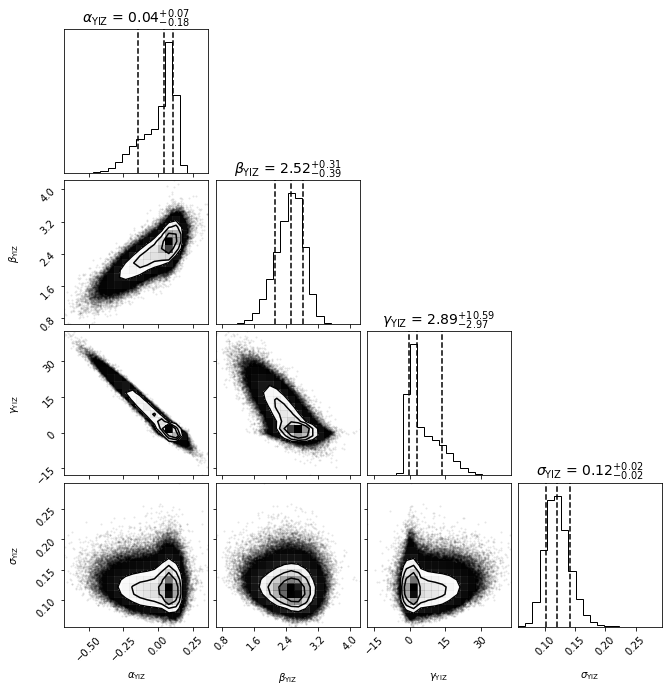

In [4]:
_100thaw = make_corner_plot("mcmc_gthaw_100", gamma_fixed=False)

### 90% completeness, $\gamma=0.42$

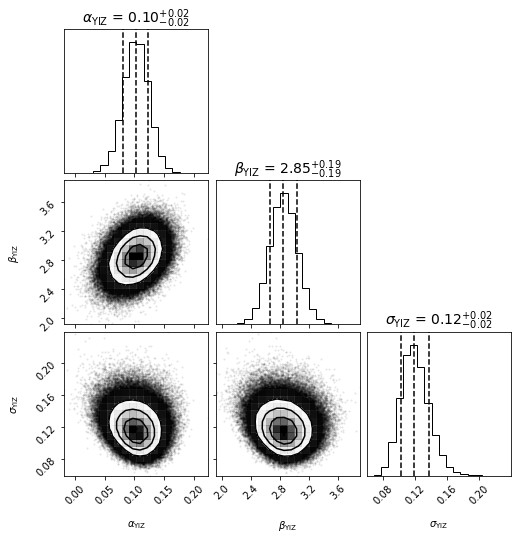

In [5]:
_90fix = make_corner_plot("mcmc_gfix_90")

### 90% completeness, $\gamma$ thawed

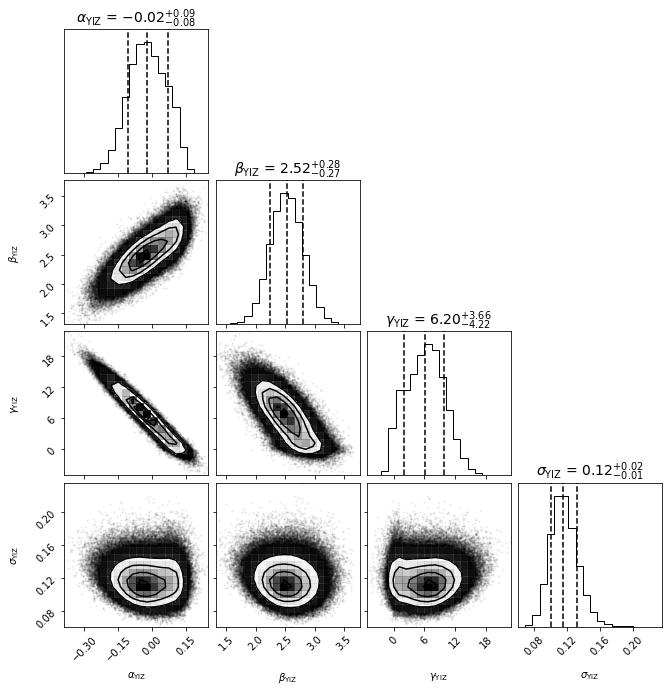

In [6]:
_90thaw = make_corner_plot("mcmc_gthaw_90", gamma_fixed=False)

### 80% completeness, $\gamma=0.42$

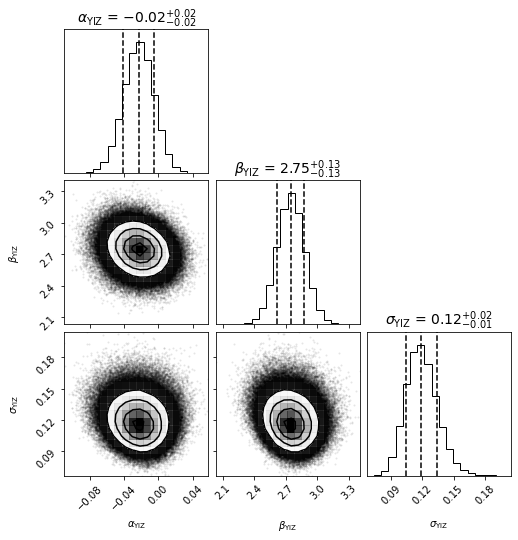

In [25]:
_80fix = make_corner_plot("mcmc_gfix_80")

### 80% completeness, $\gamma$ thawed

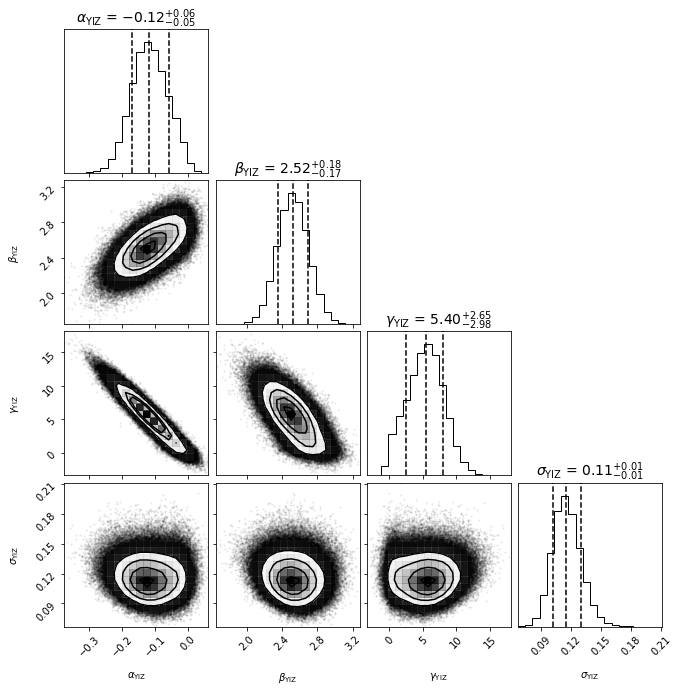

In [26]:
_80thaw = make_corner_plot("mcmc_gthaw_80", gamma_fixed=False)

### 70% completeness, $\gamma=0.42$

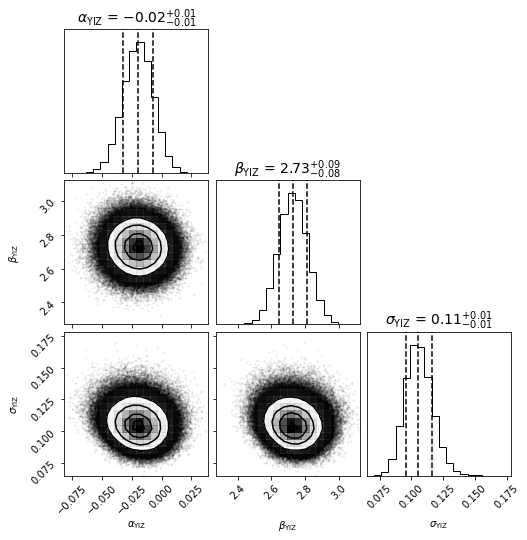

In [24]:
_70fix = make_corner_plot("mcmc_gfix_70")

### 70% completeness, $\gamma$ thawed

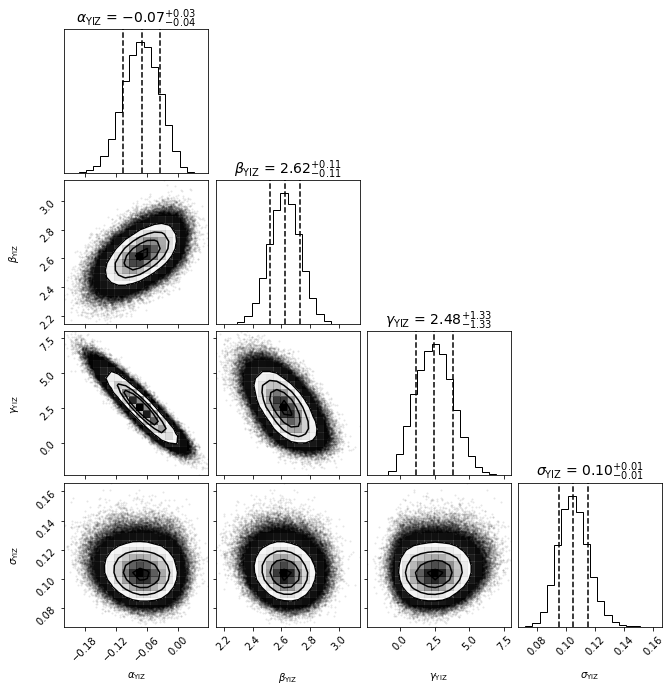

In [23]:
_70thaw = make_corner_plot("mcmc_gthaw_70", gamma_fixed=False)

### 60% completeness, $\gamma=0.42$

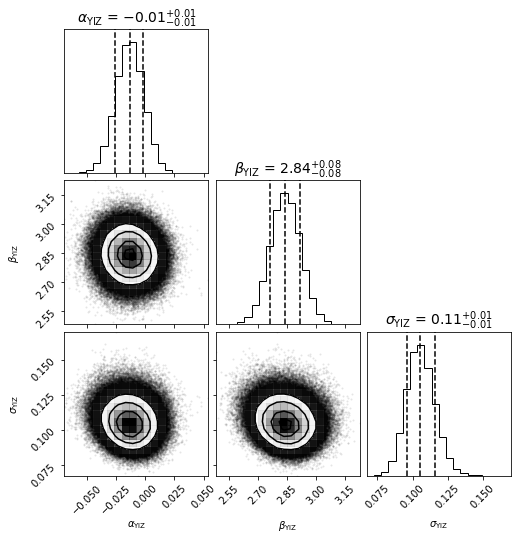

In [22]:
_60fix = make_corner_plot("mcmc_gfix_60")

### 60% completeness, $\gamma$ thawed

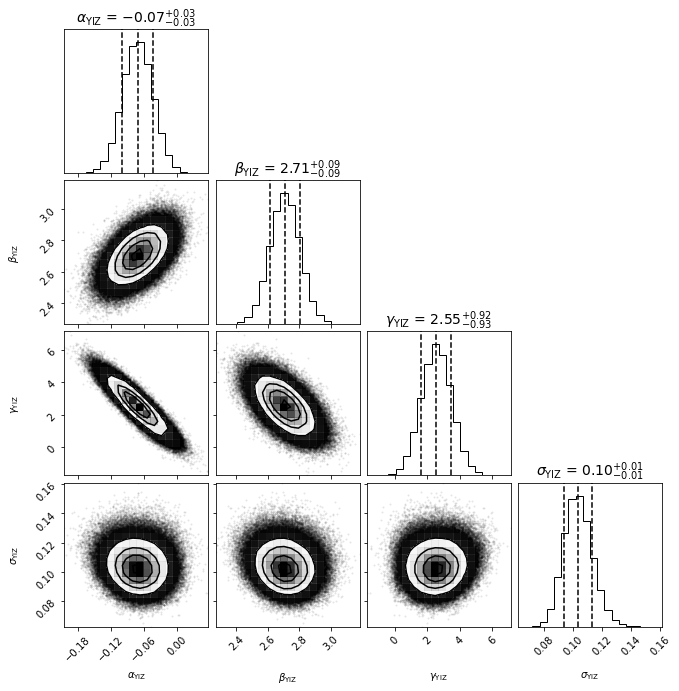

In [21]:
_60thaw = make_corner_plot("mcmc_gthaw_60", gamma_fixed=False)

### 50% completeness, $\gamma=0.42$

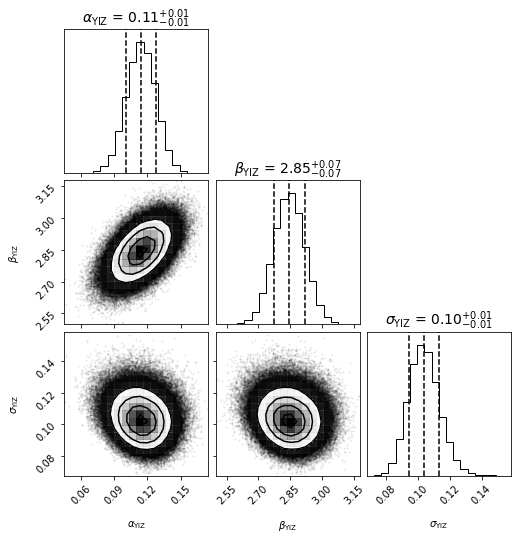

In [14]:
_50fix = make_corner_plot("mcmc_gfix_50")

### 50% completeness, $\gamma$ thawed

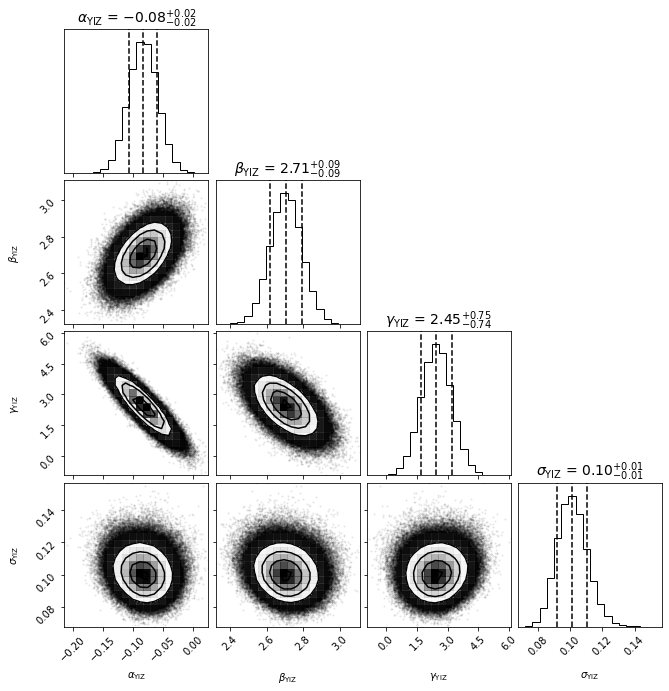

In [20]:
_50thaw = make_corner_plot("mcmc_gthaw_50", gamma_fixed=False)

### 45% completeness (all available data), $\gamma=0.42$

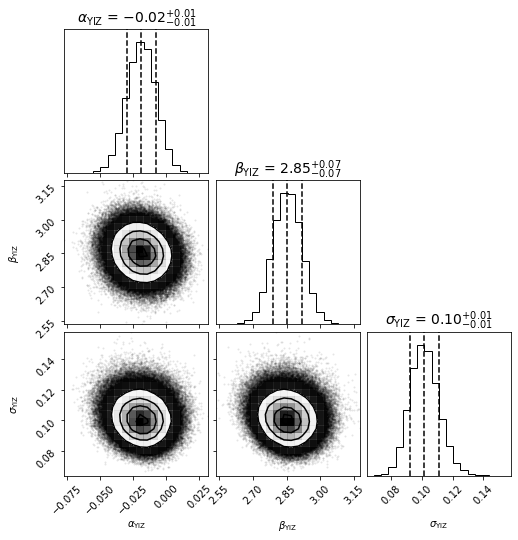

In [18]:
allfix = make_corner_plot("mcmc_gfix_all")

### 45% completeness (all available data), $\gamma$ thawed

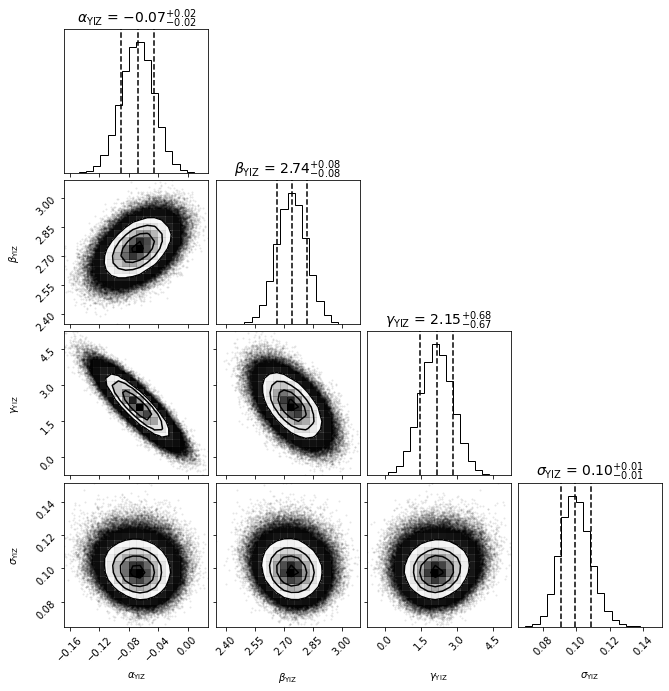

In [19]:
allthaw = make_corner_plot("mcmc_gthaw_all", gamma_fixed=False)

# Real Data
## Summary Table

| $\alpha_{YIX}$ | $\beta_{YIZ}$ | $\gamma_{YIZ}$ | $\sigma_{YIZ}$ | Notes |
| --- | --- | --- | --- | --- |
| $-0.30\pm0.017$ | $2.54\pm0.07$ | 0.42 | $0.22\pm0.011$ | - |
| $-0.30\pm0.017$ | $2.53\pm0.07$ | 0.42 | $0.22\pm0.011$ | No covariance |
| $-0.32\pm0.016$ | $2.50\pm0.07$ | 1.0 | $0.21\pm0.011$ | - |
| $-0.32\pm0.016$ | $2.50\pm0.07$ | 1.0 | $0.21\pm0.011$ | No covariance |
| $-0.37\pm0.021$ | $2.41\pm0.07$ | $2.80\pm0.47$ | $0.20\pm0.010$ | - |
| $-0.37\pm0.021$ | $2.40\pm0.07$ | $2.86\pm0.49$ | $0.20\pm0.010$ | No covariance |

* The data included here have temperature errors of $\leq10\%$.
* The inclusion of error covariance seems to make no discernible difference to the fits.

### $\gamma=0.42$, covariances included

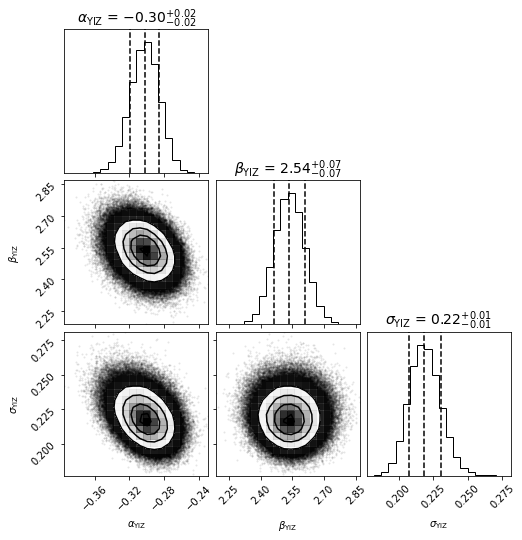

In [60]:
real42 = make_corner_plot("mcmc_gfix42_real2")

### $\gamma=1.0$, covariances included

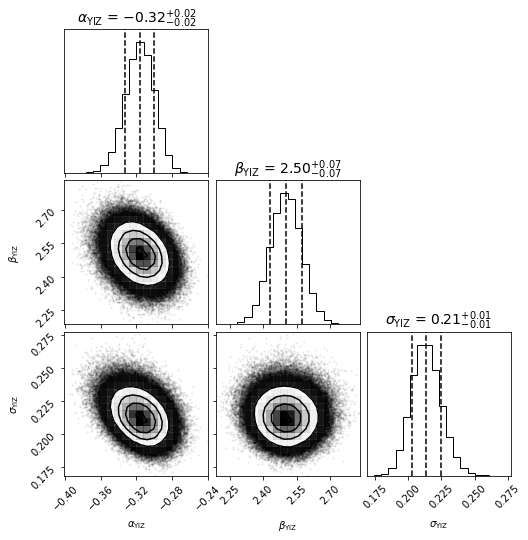

In [61]:
real42 = make_corner_plot("mcmc_gfix1_real2")

### $\gamma$ thawed, covariances included

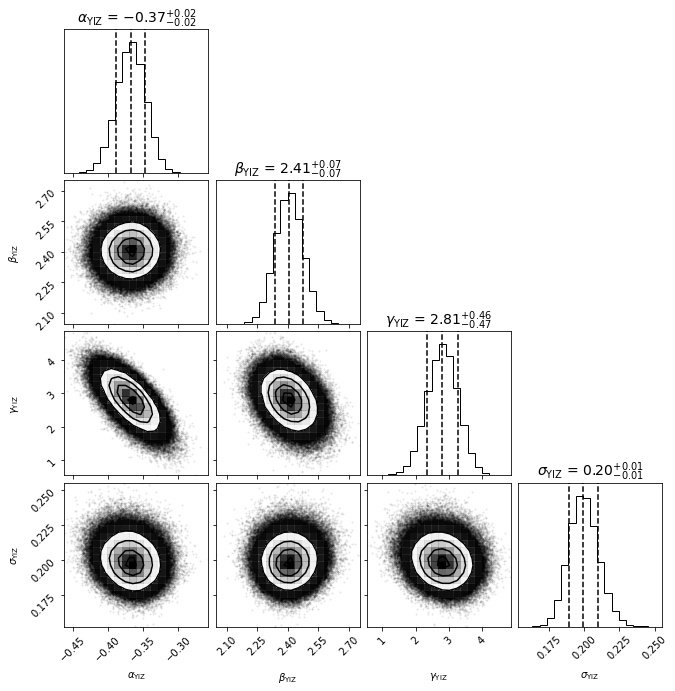

In [63]:
realthaw = make_corner_plot("mcmc_gthaw_real2", gamma_fixed=False)

## Sensitivity of real data to number of Gaussians
* For n.mixture=3, LIRA produces a runtime error stating that the prior and likelihood are incompatible so no fit is possible.
* For n.mixture=2, a fit is possible and is detailed in the table below. I tested with $\gamma$ thawed, and the fit does not differ significantly from the fit with only a single Gaussian.

## Evolution of scatter with temperature

* Clusters with less than 10% errors total 324. 
* Ordered clusters by the relevant parameter, and divide into 3 groups of 108 clusters.
* Run LIRA on each group and plot $\sigma_{YIZ}$ versus median of the relevant property.
* The first graph in each section shows the evolution of the scatter when each fit is fixed with best fit values of the parameters, the second is when everything is thawed.

Text(0, 0.5, '$\\sigma_{YIZ}$')

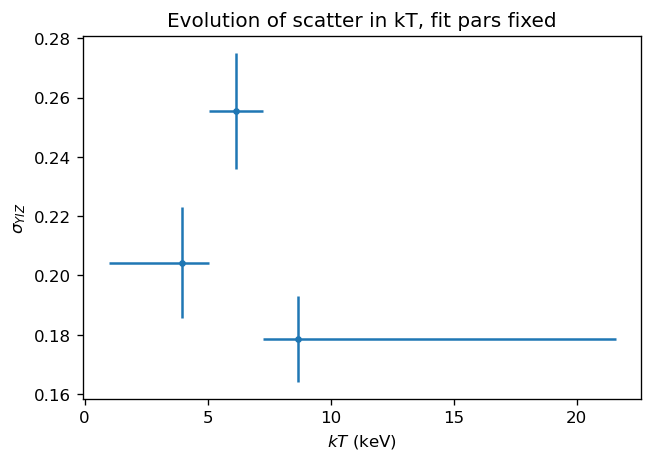

In [46]:
med = np.array([3.9653, 6.14015, 8.652665])
mins = np.array([0.970865, 5.04942, 7.26278])
maxs = np.array([5.04548, 7.23642, 21.5885])

scatter_fix = [0.20425, 0.255550, 0.17859]
scatter_sigma_fix = [0.01873, 0.01958, 0.01458]

plt.errorbar(med, scatter_fix, xerr=[med-mins, maxs-med], yerr=scatter_sigma_fix, linestyle='', marker='.')
plt.title('Evolution of scatter in kT, fit pars fixed')
plt.xlabel(r'$kT$ (keV)')
plt.ylabel(r'$\sigma_{YIZ}$')

Text(0, 0.5, '$\\sigma_{YIZ}$')

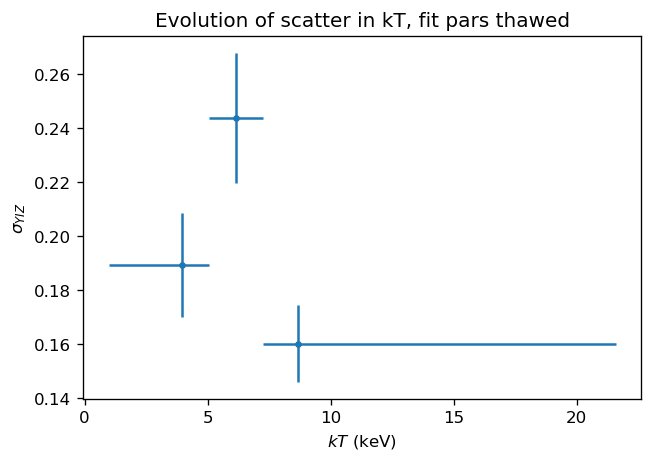

In [47]:
scatter = [0.18926, 0.243646, 0.16009]
scatter_sigma = [0.01916, 0.02419, 0.01426]
plt.errorbar(med, scatter, xerr=[med-mins, maxs-med], yerr=scatter_sigma, linestyle='', marker='.')
plt.title('Evolution of scatter in kT, fit pars thawed')
plt.xlabel(r'$kT$ (keV)')
plt.ylabel(r'$\sigma_{YIZ}$')

## Evolution of scatter with luminosity

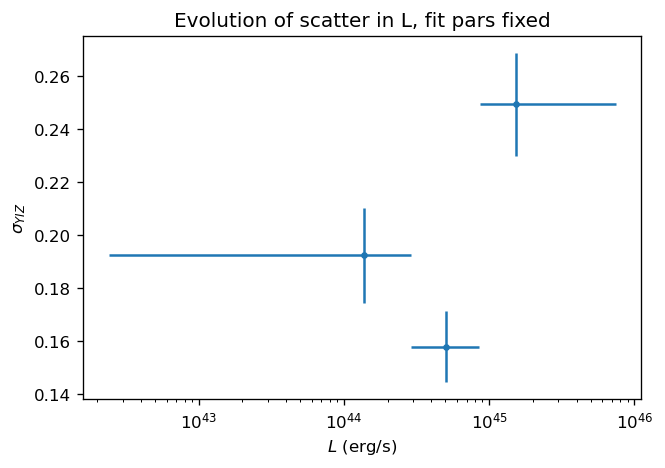

In [48]:
med = np.array([1.38074975882764e+44, 5.07298238672442e+44, 1.53477411043155e+45])
mins = np.array([2.39011767508719e+42, 2.90819126528687e+44, 8.61976844616757e+44])
maxs = np.array([2.90787841090147e+44, 8.55543932581729e+44, 7.45509119620945e+45])

scatter_fix = [0.192345, 0.157892, 0.24936]
scatter_sigma_fix = [0.01786, 0.01351, 0.01948]

plt.errorbar(med, scatter_fix, xerr=[med-mins, maxs-med], yerr=scatter_sigma_fix, linestyle='', marker='.')
plt.title('Evolution of scatter in L, fit pars fixed')
plt.xlabel(r'$L$ (erg/s)')
plt.ylabel(r'$\sigma_{YIZ}$')
plt.xscale('log')

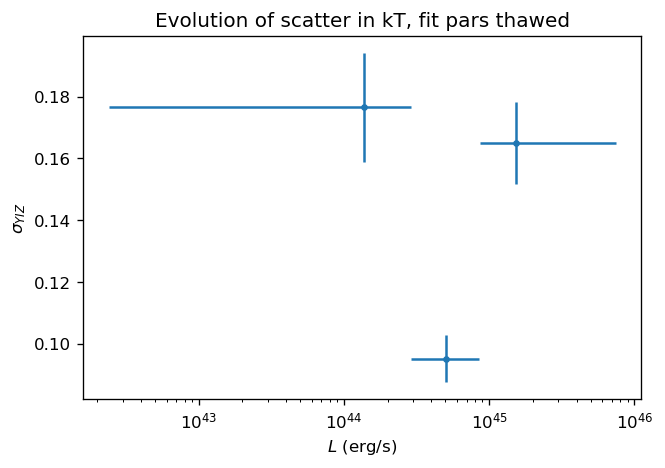

In [49]:
scatter = [0.17658, 0.09517, 0.16508]
scatter_sigma = [0.01760, 0.007652, 0.01325]

plt.errorbar(med, scatter, xerr=[med-mins, maxs-med], yerr=scatter_sigma, linestyle='', marker='.')
plt.title('Evolution of scatter in kT, fit pars thawed')
plt.xlabel(r'$L$ (erg/s)')
plt.ylabel(r'$\sigma_{YIZ}$')
plt.xscale('log')

## Evolution of scatter with redshift

Text(0, 0.5, '$\\sigma_{YIZ}$')

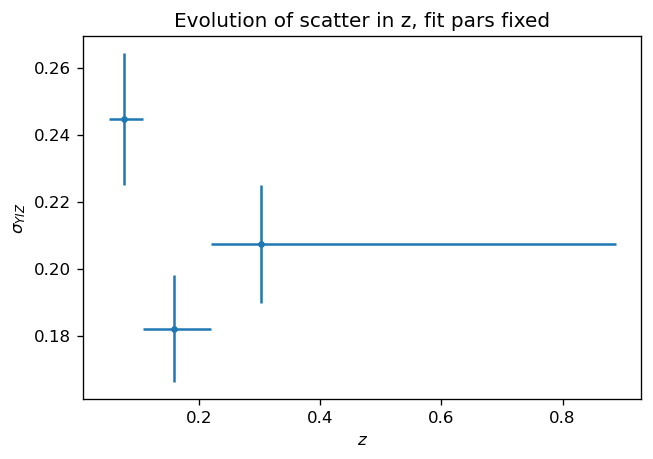

In [50]:
med = np.array([0.07585, 0.1581, 0.30145])
mins = np.array([0.0501, 0.1076, 0.2195])
maxs = np.array([0.1073, 0.2195, 0.888])

scatter_fix = [0.2447, 0.1821, 0.20748]
scatter_sigma_fix = [0.01977, 0.01601, 0.01762]

plt.errorbar(med, scatter_fix, xerr=[med-mins, maxs-med], yerr=scatter_sigma_fix, linestyle='', marker='.')
plt.title('Evolution of scatter in z, fit pars fixed')
plt.xlabel(r'$z$')
plt.ylabel(r'$\sigma_{YIZ}$')

Text(0, 0.5, '$\\sigma_{YIZ}$')

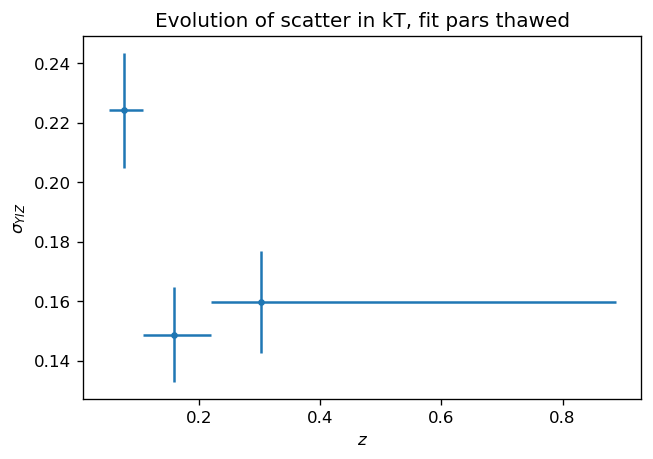

In [51]:
scatter = [0.2241, 0.14871, 0.1598]
scatter_sigma = [0.01934, 0.01594, 0.01717]

plt.errorbar(med, scatter, xerr=[med-mins, maxs-med], yerr=scatter_sigma, linestyle='', marker='.')
plt.title('Evolution of scatter in kT, fit pars thawed')
plt.xlabel(r'$z$')
plt.ylabel(r'$\sigma_{YIZ}$')

## Comparison with [Lovisari+20](https://ui.adsabs.harvard.edu/abs/2020ApJ...892..102L/abstract) SZ relations

| Relation | $\alpha_{YIX}$ | $\beta_{YIZ}$ | $\gamma_{YIZ}$ | $\sigma_{XIZ}$ | $\sigma_{YIZ}$ |
| --- | --- | --- | --- | --- | --- |
| Lovisari+20 | $-0.360\pm0.031$ | $2.409\pm0.292$ | $1.170\pm0.822$ | $0.038\pm0.011$ | $0.036\pm0.016$ |
| Mine | $-0.360\pm0.021$ | $2.52\pm0.10$ | $2.69\pm0.47$ | $0.039\pm0.015$ | $0.170\pm0.025$ |
| --- | --- | --- | --- | --- | --- |
| Lovisari+20 | $-0.390\pm0.020$ | $2.732\pm0.143$ | 1.0 | $0.043\pm0.004$ | $0.030\pm0.008$ |
| Mine | $-0.309\pm0.016$ | $2.66\pm0.11$ | 1.0 | $0.047\pm0.015$ | $0.1688\pm0.028$ |
| --- | --- | --- | --- | --- | --- |
| Lovisari+20 | $-0.347\pm0.016$ | $2.292\pm0.106$ | 1.0 | 0.0 | $0.111\pm0.009$ |
| Mine | $-0.32\pm0.016$ | $2.50\pm0.07$ | 1.0 | 0.0 | $0.21\pm0.011$ |

## $\sigma_{XIZ}$ corner plot
* no $z$ scaling, $\gamma$ thawed

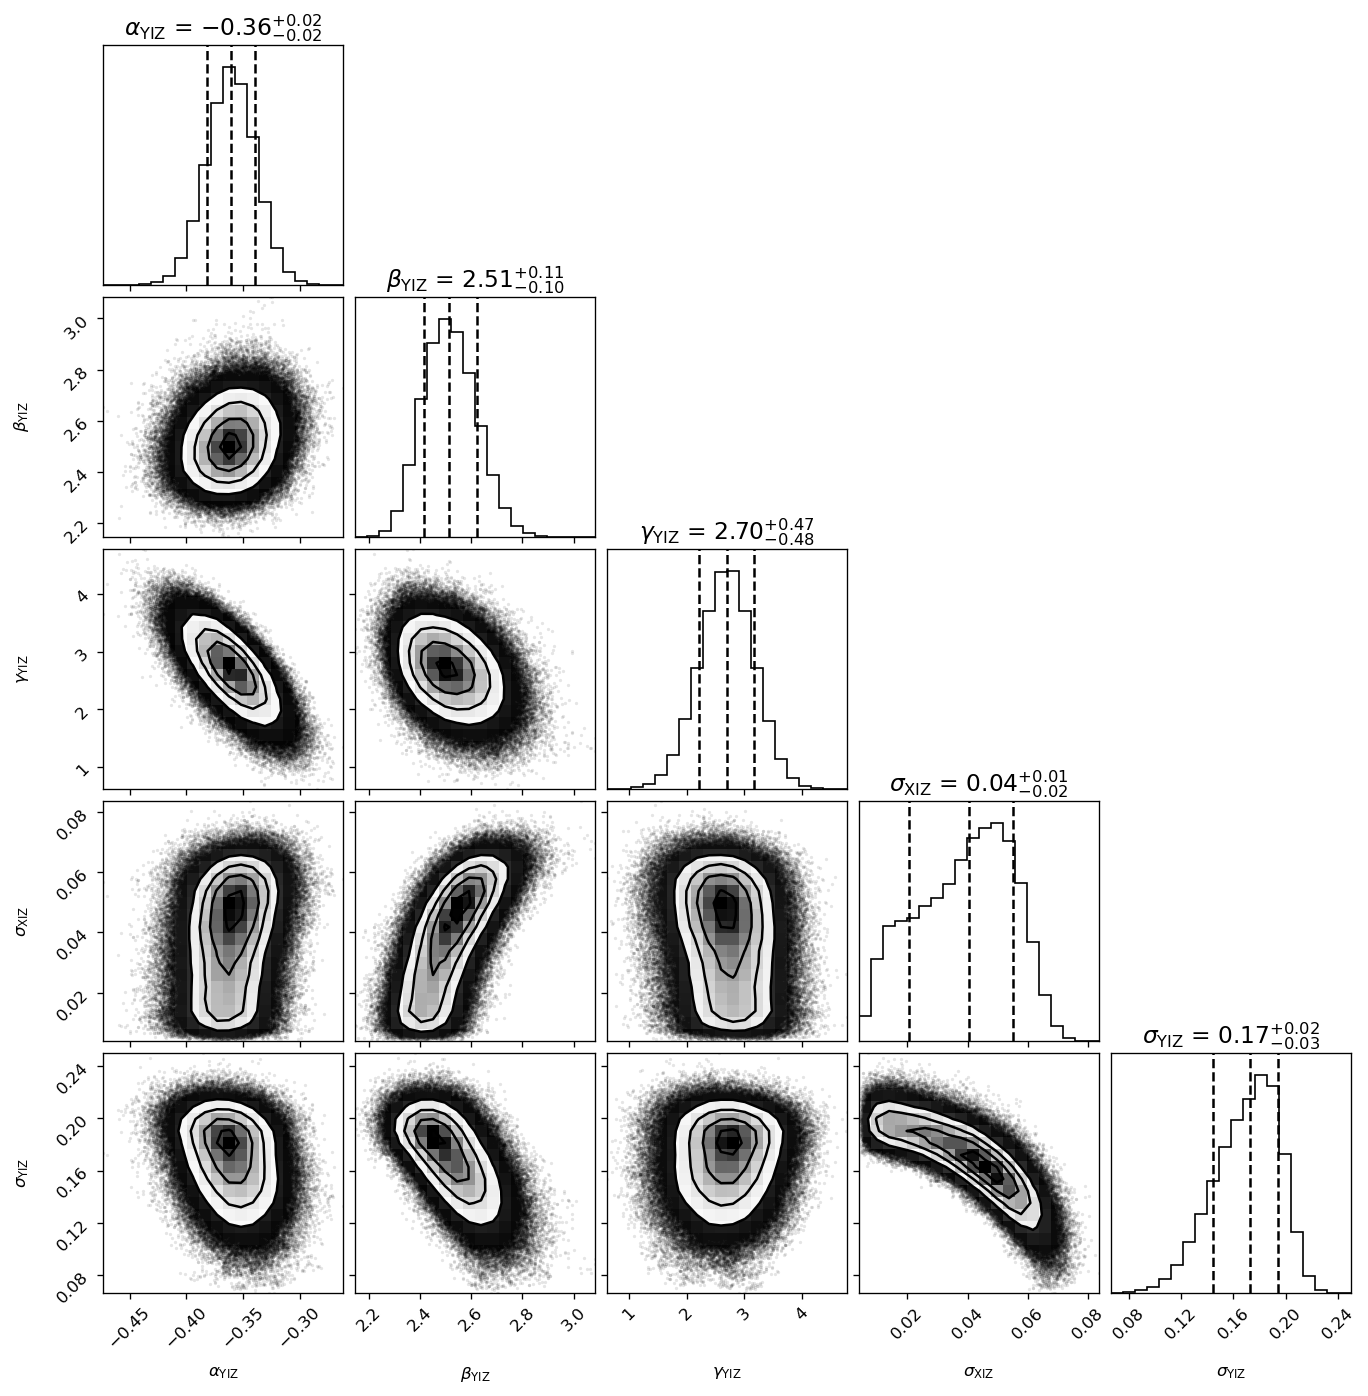

In [3]:
df = pd.read_csv(f"/Users/rd268277/analysis/charms/scaling/fake_data/mcmc_gthaw_xscat_real2.dat", sep='\s+')
data = np.vstack([np.array(df["alpha.YIZ"]), np.array(df["beta.YIZ"]), np.array(df["gamma.YIZ"]), np.array(df["sigma.XIZ.0"]), np.array(df["sigma.YIZ.0"])]).T
figure = corner.corner(data, labels=[r"$\alpha_{\rm YIZ}$", r"$\beta_{\rm YIZ}$", r"$\gamma_{\rm YIZ}$", r"$\sigma_{\rm XIZ}$", r"$\sigma_{\rm YIZ}$"], quantiles=[0.16, 0.5, 0.84], show_titles=True, title_kwargs={"fontsize": 14})

## RA and Dec of Clusters

In [47]:
dat = pd.read_csv("/Users/rd268277/analysis/charms/scaling/data/charms_lt_radec.csv")
ra = coord.Angle(dat.ra, unit=u.hour)
dec = coord.Angle(dat.dec, unit=u.degree)


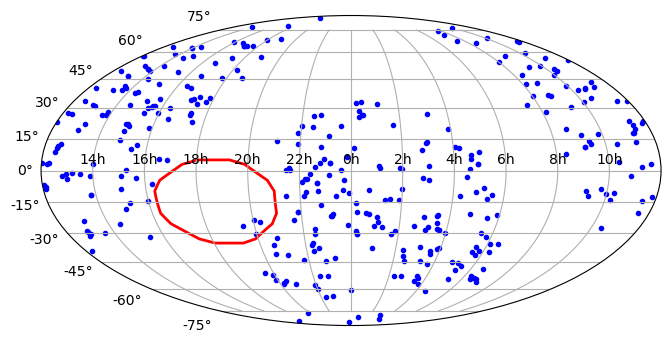

In [63]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(ra.wrap_at(180*u.degree).radian, dec.radian, color='blue', marker='.')
ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
ax.grid(True)
racent = coord.Angle(280.0, unit=u.degree)
deccent = coord.Angle(-15.0, unit=u.degree)
ellipse = Ellipse(xy=(racent.wrap_at(180*u.degree).radian, deccent.radian), width=2.0*35.0*(np.pi/180), 
                  height=2.0*20.0*(np.pi/180), edgecolor='r', fc='None', lw=2)
ax.add_patch(ellipse)

* Blue points show the distribution of clusters in the CHARMS sample
* Red ellipse is the location of the 9% spatial variation in local $H_0$ ([Migkas+21](https://ui.adsabs.harvard.edu/abs/2021A%26A...649A.151M/abstract))
* Only a handful of the clusters in the sample fall in this region

## $z_{ref}$ testing
### $\gamma$ thawed, $z_{ref}=0.16$
* Aids with the degeneracy between $\alpha_{YIZ}$ and $\gamma_{YIZ}$

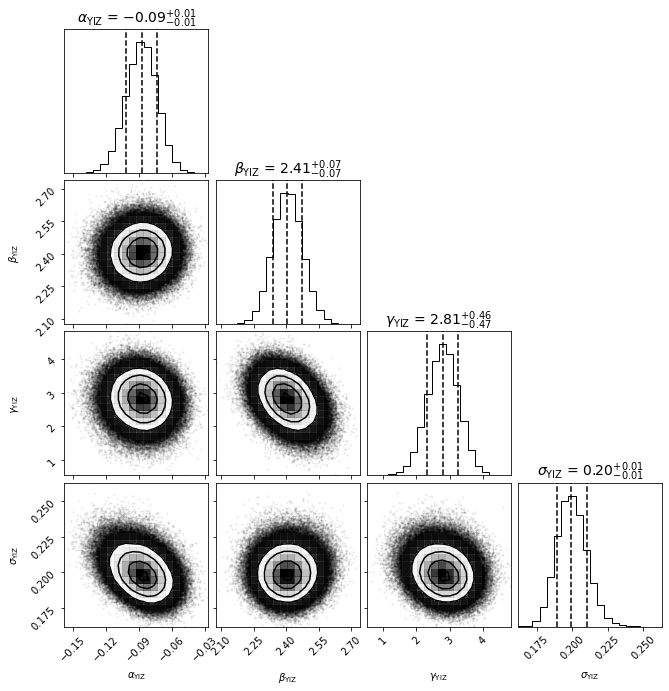

In [4]:
allthaw = make_corner_plot("mcmc_gthaw_real2_zref", gamma_fixed=False)

### $\gamma$ thawed, $\sigma_{XIZ}$ thawed, $z_{ref}=0.16$

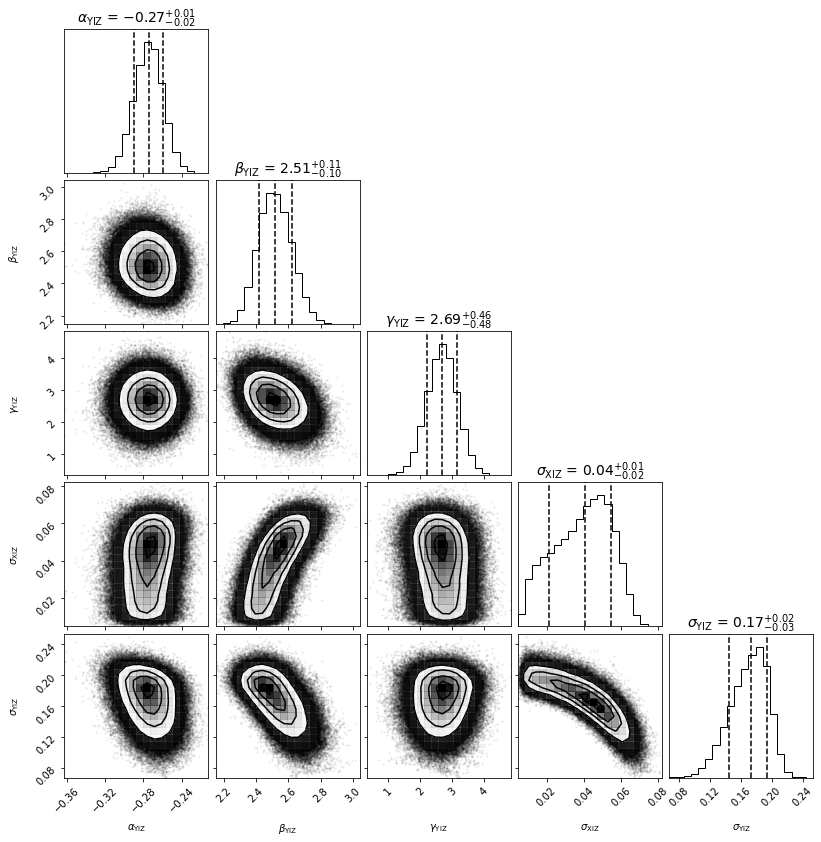

In [51]:
df = pd.read_csv(f"/Users/rd268277/analysis/charms/scaling/fake_data/mcmc_gthaw_real2_zref_xscat.dat", sep='\s+')
data = np.vstack([np.array(df["alpha.YIZ"]), np.array(df["beta.YIZ"]), np.array(df["gamma.YIZ"]), np.array(df["sigma.XIZ.0"]), np.array(df["sigma.YIZ.0"])]).T
figure = corner.corner(data, labels=[r"$\alpha_{\rm YIZ}$", r"$\beta_{\rm YIZ}$", r"$\gamma_{\rm YIZ}$", r"$\sigma_{\rm XIZ}$", r"$\sigma_{\rm YIZ}$"], quantiles=[0.16, 0.5, 0.84], show_titles=True, title_kwargs={"fontsize": 14})